In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

Text(0, 0.5, '')

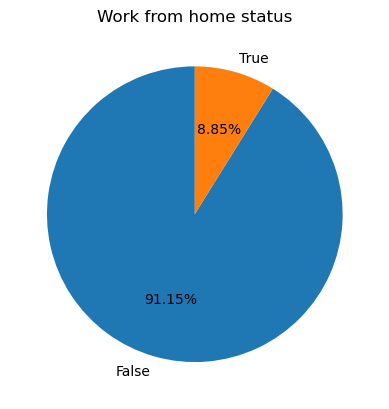

In [13]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90, autopct='%1.2f%%')
plt.title('Work from home status')
plt.ylabel('')

Text(0, 0.5, '')

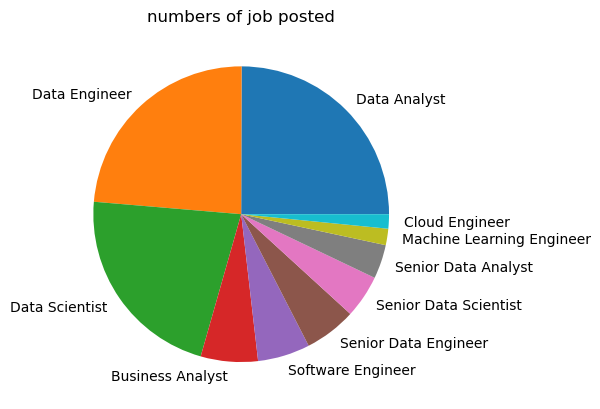

In [ ]:
# Hard to tell which is higher between job

df['job_title_short'].value_counts().plot(kind='pie')
plt.title('numbers of job posted')
plt.ylabel('')

Text(0, 0.5, '')

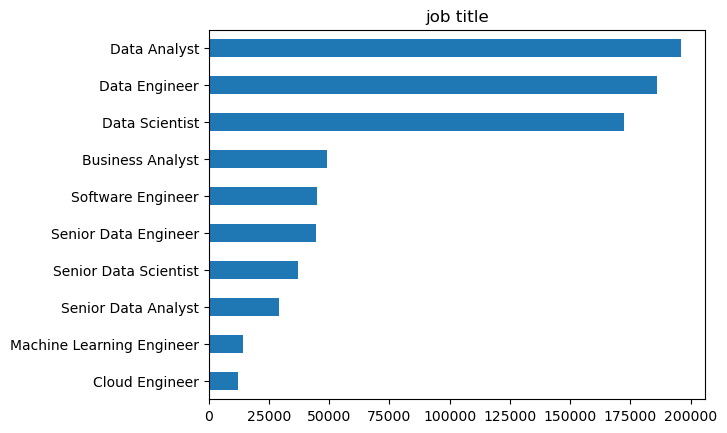

In [ ]:
#can easily see the difference for each job

df['job_title_short'].value_counts().sort_values().plot(kind='barh')
plt.title('job title')
plt.ylabel('')

In [14]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


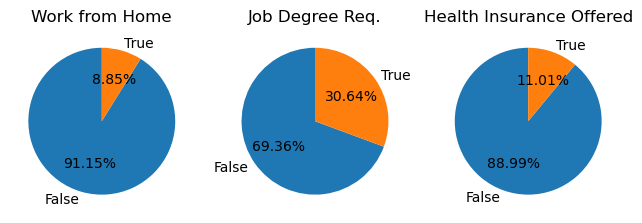

In [25]:
fig, ax = plt.subplots(1,3)

dict_column = {'job_work_from_home':'Work from Home',
           'job_no_degree_mention': 'Job Degree Req.',
           'job_health_insurance': 'Health Insurance Offered'
}

for i,(column,title) in enumerate(dict_column.items()):
    df[column].value_counts().plot(kind='pie',startangle=90,autopct='%1.2f%%',ax=ax[i],title=title,ylabel='')

fig.tight_layout()
